In [1]:
# Import modules needed for data cleaning process
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_8381/1654926561.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the data 
listings = pd.read_csv('/Users/tonymoceri/MSBDSA/CSE_Project/Potential_Datasets/bnb_data/detailed_listings.csv')

In [3]:
# Let's take a look at the data
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,816783428767938211,https://www.airbnb.com/rooms/816783428767938211,20240307173355,2024-03-08,city scrape,Cool studio 3 min from subway!,My studio is 3 minutes from the subway.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,47125955,...,5.0,5.0,5.0,NaN,f,2,2,0,0,0.96
1,8686040,https://www.airbnb.com/rooms/8686040,20240307173355,2024-03-08,previous scrape,LARGE MANHATTAN ONE BEDROOM,-WELL LIT<br />-SPACIOUS<br />-HARDWOOD FLOORI...,NaN,https://a0.muscache.com/pictures/c74d9b4f-e30d...,45608786,...,4.2,3.8,4.0,NaN,f,1,1,0,0,0.05
2,12426778,https://www.airbnb.com/rooms/12426778,20240307173355,2024-03-08,previous scrape,TH BRKLYN,TH BRKLYN,NaN,https://a0.muscache.com/pictures/e13d8696-7765...,7963317,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,22671517,https://www.airbnb.com/rooms/22671517,20240307173355,2024-03-08,previous scrape,55 washington,Hi,NaN,https://a0.muscache.com/pictures/d1639c0b-de9c...,3428456,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,35776956,https://www.airbnb.com/rooms/35776956,20240307173355,2024-03-08,previous scrape,luxury apt in long lsland city 1min to subway,NaN,NaN,https://a0.muscache.com/pictures/3d41256d-92c1...,221012726,...,2.0,4.0,2.0,NaN,f,1,0,1,0,0.02


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39319 entries, 0 to 39318
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39319 non-null  int64  
 1   listing_url                                   39319 non-null  object 
 2   scrape_id                                     39319 non-null  int64  
 3   last_scraped                                  39319 non-null  object 
 4   source                                        39319 non-null  object 
 5   name                                          39317 non-null  object 
 6   description                                   38235 non-null  object 
 7   neighborhood_overview                         22470 non-null  object 
 8   picture_url                                   39319 non-null  object 
 9   host_id                                       39319 non-null 

In [5]:
# Let's drop the columns that are not needed for analysis 
listings = listings.drop(['listing_url','scrape_id','last_scraped','source','name','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_location','host_about','host_response_time','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','first_review','last_review','number_of_reviews_l30d','license','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis=1)

In [6]:
# Let's get the listings that are just within Manhattan and have a property_type of entire home/apt
listings = listings[(listings['neighbourhood_group_cleansed'] == 'Manhattan') & (listings['room_type'] == 'Entire home/apt')]

In [7]:
# Let's drop the host_response_rate, neighbourhood_group_cleansed, property_type, room_type, and description columns 
listings = listings.drop(['host_response_rate','neighbourhood_group_cleansed','property_type','room_type','description'], axis=1)

In [8]:
listings.head()

,id,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,8686040,Inwood,40.859990,-73.928500,3,NaN,1 bath,1.0,NaN,"[""Air conditioning"", ""Wifi"", ""Smoke alarm"", ""E...",NaN,5,4.0,3.8,4.00,4.20,4.2,3.8,4.0,0.05
11,977732692492896948,Harlem,40.825420,-73.948450,6,1.0,1 bath,2.0,3.0,"[""Oven"", ""Free washer \u2013 In unit"", ""Dryer ...",$321.00,6,5.0,5.0,4.67,4.83,5.0,4.5,4.5,2.54
19,45345628,Financial District,40.705600,-74.008780,2,1.0,1 bath,1.0,1.0,"[""Oven"", ""Refrigerator"", ""Gym"", ""Dishwasher"", ...",$236.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,973653,Harlem,40.824050,-73.940000,3,1.0,1 bath,1.0,2.0,"[""Oven"", ""Dishes and silverware"", ""Refrigerato...",$100.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,1068865752426485135,Morningside Heights,40.804542,-73.959709,6,2.0,2 baths,2.0,4.0,"[""Dishes and silverware"", ""Refrigerator"", ""Air...",$250.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10720 entries, 1 to 39318
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10720 non-null  int64  
 1   neighbourhood_cleansed       10720 non-null  object 
 2   latitude                     10720 non-null  float64
 3   longitude                    10720 non-null  float64
 4   accommodates                 10720 non-null  int64  
 5   bathrooms                    6847 non-null   float64
 6   bathrooms_text               10720 non-null  object 
 7   bedrooms                     9962 non-null   float64
 8   beds                         6831 non-null   float64
 9   amenities                    10720 non-null  object 
 10  price                        6832 non-null   object 
 11  number_of_reviews            10720 non-null  int64  
 12  review_scores_rating         7166 non-null   float64
 13  review_scores_accurac

In [10]:
# For the "Bathrooms text" columns, lets remove the text from the column and just preserve the number 
listings['bathrooms_text'] = listings['bathrooms_text'].str.extract('(\d+)')

In [11]:
# For any values in the Bathrooms columns that are NaNs, replace them with the value in the corresponding row of the Bathrooms_Text column
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms_text'])

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10720 entries, 1 to 39318
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10720 non-null  int64  
 1   neighbourhood_cleansed       10720 non-null  object 
 2   latitude                     10720 non-null  float64
 3   longitude                    10720 non-null  float64
 4   accommodates                 10720 non-null  int64  
 5   bathrooms                    10711 non-null  object 
 6   bathrooms_text               10708 non-null  object 
 7   bedrooms                     9962 non-null   float64
 8   beds                         6831 non-null   float64
 9   amenities                    10720 non-null  object 
 10  price                        6832 non-null   object 
 11  number_of_reviews            10720 non-null  int64  
 12  review_scores_rating         7166 non-null   float64
 13  review_scores_accurac

In [13]:
# Drop the Bathrooms_text column 
listings = listings.drop(['bathrooms_text'], axis=1)

In [14]:
# Make sure all of the values in the bathrooms column are numeric 
listings['bathrooms'] = pd.to_numeric(listings['bathrooms'])

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10720 entries, 1 to 39318
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10720 non-null  int64  
 1   neighbourhood_cleansed       10720 non-null  object 
 2   latitude                     10720 non-null  float64
 3   longitude                    10720 non-null  float64
 4   accommodates                 10720 non-null  int64  
 5   bathrooms                    10711 non-null  float64
 6   bedrooms                     9962 non-null   float64
 7   beds                         6831 non-null   float64
 8   amenities                    10720 non-null  object 
 9   price                        6832 non-null   object 
 10  number_of_reviews            10720 non-null  int64  
 11  review_scores_rating         7166 non-null   float64
 12  review_scores_accuracy       7160 non-null   float64
 13  review_scores_cleanli

In [16]:
# Price is currently listed as an object. Let's remove the dollar sign and convert to a float 
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')

listings['price'] = pd.to_numeric(listings['price'])

In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10720 entries, 1 to 39318
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10720 non-null  int64  
 1   neighbourhood_cleansed       10720 non-null  object 
 2   latitude                     10720 non-null  float64
 3   longitude                    10720 non-null  float64
 4   accommodates                 10720 non-null  int64  
 5   bathrooms                    10711 non-null  float64
 6   bedrooms                     9962 non-null   float64
 7   beds                         6831 non-null   float64
 8   amenities                    10720 non-null  object 
 9   price                        6832 non-null   float64
 10  number_of_reviews            10720 non-null  int64  
 11  review_scores_rating         7166 non-null   float64
 12  review_scores_accuracy       7160 non-null   float64
 13  review_scores_cleanli

In [18]:
# For the beds column, let's replace the NaN's with the mean value associated with the number of bedrooms in the corresponding row 
listings['beds'] = listings['beds'].fillna(listings.groupby('bedrooms')['beds'].transform('mean'))

In [19]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10720 entries, 1 to 39318
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10720 non-null  int64  
 1   neighbourhood_cleansed       10720 non-null  object 
 2   latitude                     10720 non-null  float64
 3   longitude                    10720 non-null  float64
 4   accommodates                 10720 non-null  int64  
 5   bathrooms                    10711 non-null  float64
 6   bedrooms                     9962 non-null   float64
 7   beds                         9988 non-null   float64
 8   amenities                    10720 non-null  object 
 9   price                        6832 non-null   float64
 10  number_of_reviews            10720 non-null  int64  
 11  review_scores_rating         7166 non-null   float64
 12  review_scores_accuracy       7160 non-null   float64
 13  review_scores_cleanli

In [20]:
# Let's look at the proportion of NaNs for each feature and sort by the largest 
missing_values = listings.isnull().mean()*100

missing_values = missing_values.sort_values(ascending=False)

missing_values

price                          36.268657
review_scores_checkin          33.218284
review_scores_accuracy         33.208955
review_scores_value            33.208955
review_scores_location         33.208955
reviews_per_month              33.208955
review_scores_cleanliness      33.190299
review_scores_communication    33.190299
review_scores_rating           33.152985
bedrooms                        7.070896
beds                            6.828358
bathrooms                       0.083955
amenities                       0.000000
neighbourhood_cleansed          0.000000
number_of_reviews               0.000000
accommodates                    0.000000
longitude                       0.000000
latitude                        0.000000
id                              0.000000
dtype: float64

In [21]:
listings.dropna(subset=['price'], inplace=True)

<Axes: xlabel='price', ylabel='Count'>

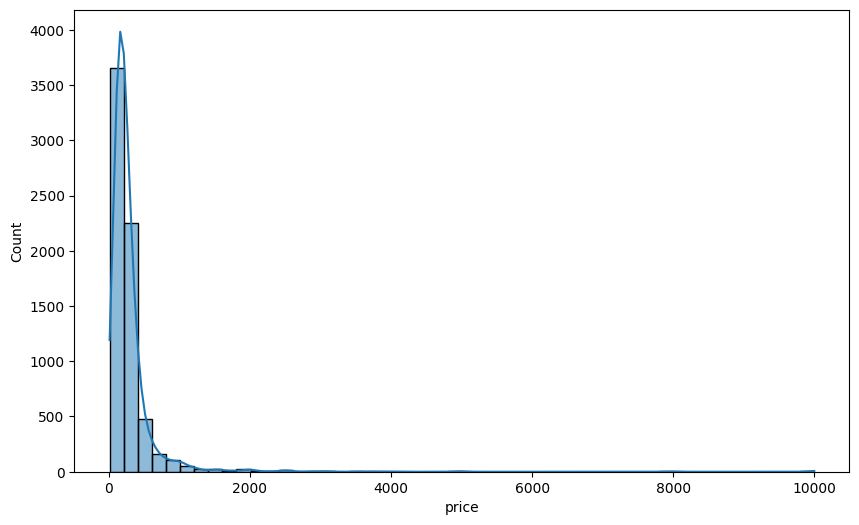

In [22]:
# Now that we have a manageable number of features, let's take a look at how the features are distributed. Let's start with the target variable Price
plt.figure(figsize=(10,6))
sns.histplot(listings['price'], bins=50, kde=True)

In [23]:
# We can see very clearly that the Price variable is right-skewed. Let's log-transform price to try and fix this skewness 
listings['log_price'] = np.log1p(listings['price'])

<Axes: xlabel='log_price', ylabel='Count'>

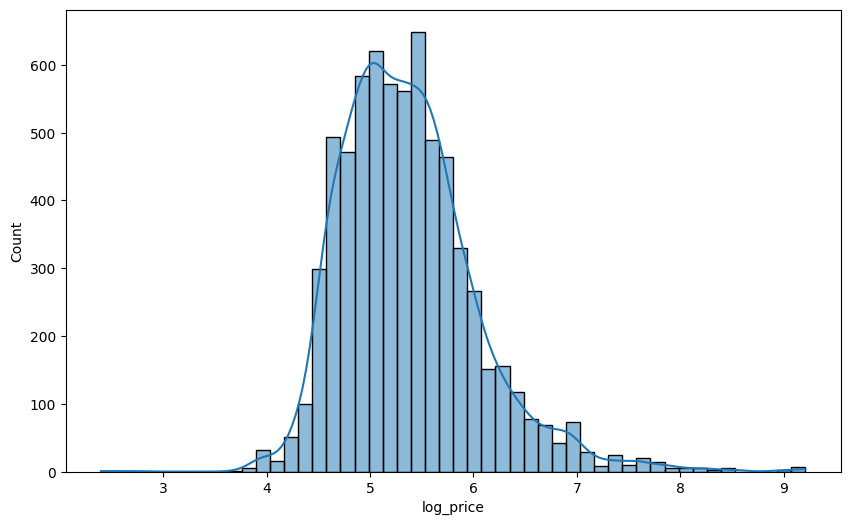

In [24]:
# Let's look at the distribution now 
plt.figure(figsize=(10,6))
sns.histplot(listings['log_price'], bins=50, kde=True)

In [25]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6832 entries, 11 to 39051
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6832 non-null   int64  
 1   neighbourhood_cleansed       6832 non-null   object 
 2   latitude                     6832 non-null   float64
 3   longitude                    6832 non-null   float64
 4   accommodates                 6832 non-null   int64  
 5   bathrooms                    6832 non-null   float64
 6   bedrooms                     6806 non-null   float64
 7   beds                         6832 non-null   float64
 8   amenities                    6832 non-null   object 
 9   price                        6832 non-null   float64
 10  number_of_reviews            6832 non-null   int64  
 11  review_scores_rating         4416 non-null   float64
 12  review_scores_accuracy       4412 non-null   float64
 13  review_scores_cleanli

In [26]:
# Fill the NaN's for all of the numerical columns with NaN's with the mean of that column
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mean())
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(listings['review_scores_rating'].mean())
listings['review_scores_accuracy'] = listings['review_scores_accuracy'].fillna(listings['review_scores_accuracy'].mean())
listings['review_scores_cleanliness'] = listings['review_scores_cleanliness'].fillna(listings['review_scores_cleanliness'].mean())
listings['review_scores_checkin'] = listings['review_scores_checkin'].fillna(listings['review_scores_checkin'].mean())
listings['review_scores_communication'] = listings['review_scores_communication'].fillna(listings['review_scores_communication'].mean())
listings['review_scores_location'] = listings['review_scores_location'].fillna(listings['review_scores_location'].mean())
listings['review_scores_value'] = listings['review_scores_value'].fillna(listings['review_scores_value'].mean())
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(listings['reviews_per_month'].mean())


ValueError: num must be an integer with 1 <= num <= 6, not 7

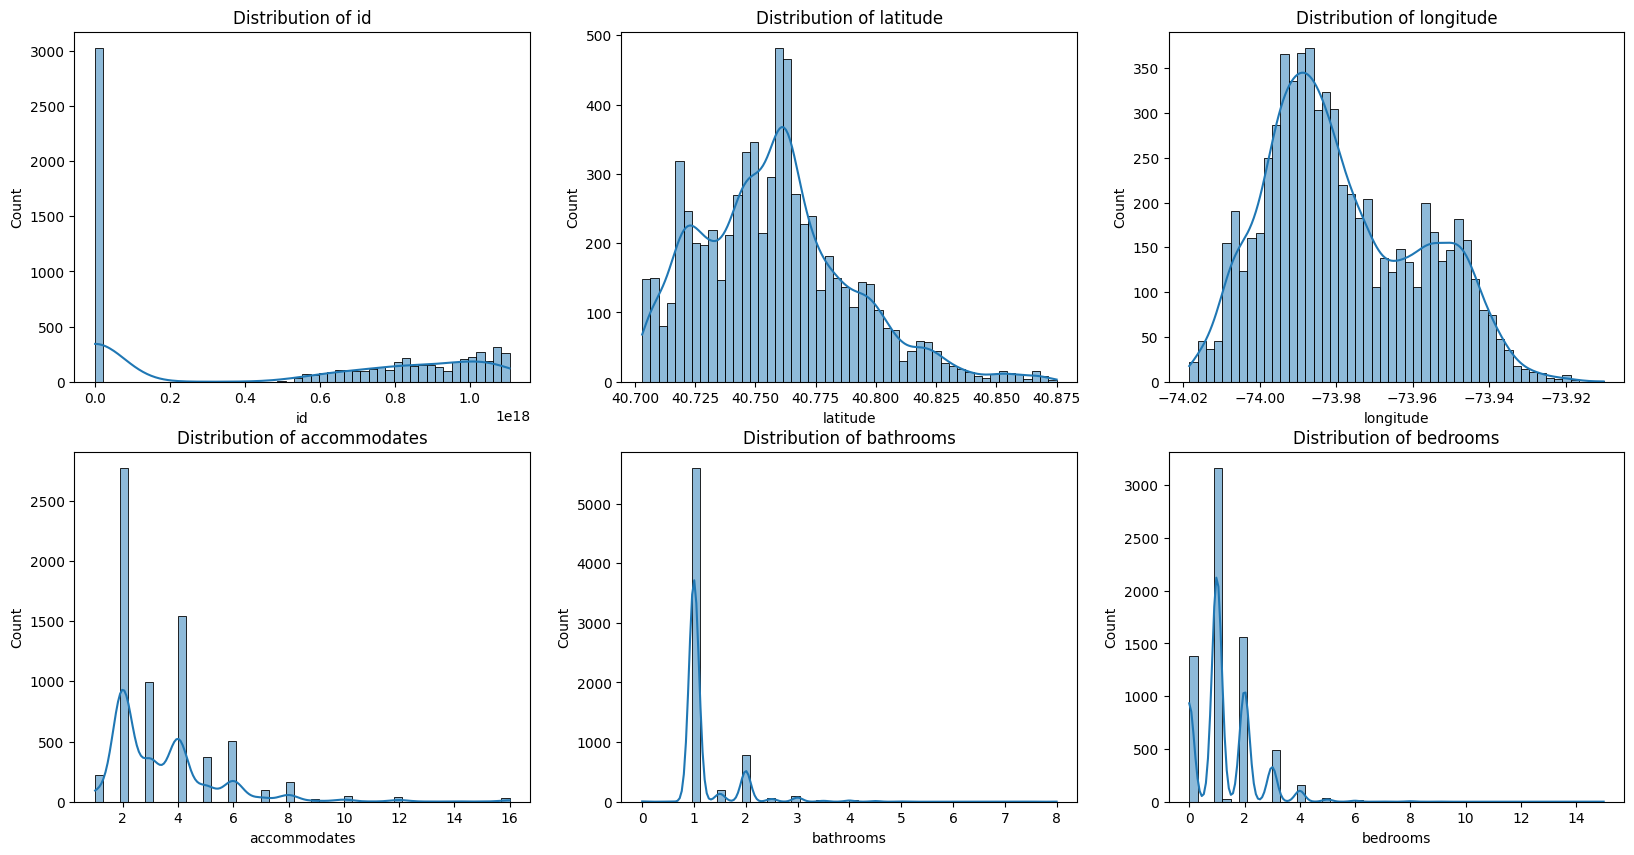

In [27]:
# Much more normally distibuted! Now, let's make a subplot to see the distributions of our remaining numerical features 
numerical_features = listings.select_dtypes(include=[np.number])

plt.figure(figsize=(20,10))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(numerical_features[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')


In [28]:
# Let's look at the value counts 
listings['accommodates'].value_counts()

accommodates
2     2770
4     1541
3      991
6      508
5      371
1      222
8      165
7       95
10      51
12      41
16      34
9       20
14       9
15       5
11       5
13       4
Name: count, dtype: int64

In [29]:
# Let's drop listings that accommodate more than 8 people 
listings = listings[listings['accommodates'] <= 8]

In [30]:
listings['bedrooms'].value_counts()

bedrooms
1.000000    3158
2.000000    1546
0.000000    1367
3.000000     454
4.000000     100
1.280194      26
5.000000       7
8.000000       5
Name: count, dtype: int64

In [31]:
# Let's drop listings that have more than 4 bedrooms, and group the listings that have 1.280194 bedrooms to just having 1 bedroom 
listings = listings[listings['bedrooms'] <= 4]

listings['bedrooms'] = listings['bedrooms'].replace(1.280194, 1)

In [32]:
listings['beds'].value_counts()

beds
1.000000    3396
2.000000    1965
3.000000     752
4.000000     270
0.000000     171
5.000000      57
6.000000      16
1.246734      10
1.268817       6
7.000000       6
8.000000       2
Name: count, dtype: int64

In [33]:
# let's drop listings with more than 4 beds, and anything that has 1.246734, 1.268817, or 0.0 beds, lump into 1 beds
listings = listings[listings['beds'] <= 4]

listings['beds'] = listings['beds'].replace(1.246734, 1)
listings['beds'] = listings['beds'].replace(1.268817, 1)
listings['beds'] = listings['beds'].replace(0.0, 1)

In [34]:
listings['bathrooms'].value_counts()

bathrooms
1.0    5536
2.0     687
1.5     193
3.0      64
2.5      53
3.5      13
4.0      11
0.0       7
4.5       4
0.5       2
Name: count, dtype: int64

In [35]:
# Let's drop listings with more than 3 bathrooms 
listings = listings[listings['bathrooms'] <= 3]

In [36]:
# Now, let's look at the listings info 
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6542 entries, 11 to 39051
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6542 non-null   int64  
 1   neighbourhood_cleansed       6542 non-null   object 
 2   latitude                     6542 non-null   float64
 3   longitude                    6542 non-null   float64
 4   accommodates                 6542 non-null   int64  
 5   bathrooms                    6542 non-null   float64
 6   bedrooms                     6542 non-null   float64
 7   beds                         6542 non-null   float64
 8   amenities                    6542 non-null   object 
 9   price                        6542 non-null   float64
 10  number_of_reviews            6542 non-null   int64  
 11  review_scores_rating         6542 non-null   float64
 12  review_scores_accuracy       6542 non-null   float64
 13  review_scores_cleanli

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Harlem'),
  Text(1, 0, 'Financial District'),
  Text(2, 0, 'Morningside Heights'),
  Text(3, 0, 'Upper East Side'),
  Text(4, 0, 'Upper West Side'),
  Text(5, 0, 'East Harlem'),
  Text(6, 0, 'West Village'),
  Text(7, 0, "Hell's Kitchen"),
  Text(8, 0, 'SoHo'),
  Text(9, 0, 'Greenwich Village'),
  Text(10, 0, 'Chelsea'),
  Text(11, 0, 'Battery Park City'),
  Text(12, 0, 'Murray Hill'),
  Text(13, 0, 'Gramercy'),
  Text(14, 0, 'Kips Bay'),
  Text(15, 0, 'Midtown'),
  Text(16, 0, 'Theater District'),
  Text(17, 0, 'Little Italy'),
  Text(18, 0, 'East Village'),
  Text(19, 0, 'Tribeca'),
  Text(20, 0, 'Stuyvesant Town'),
  Text(21, 0, 'Two Bridges'),
  Text(22, 0, 'Lower East Side'),
  Text(23, 0, 'Chinatown'),
  Text(24, 0, 'Inwood'),
  Text(25, 0, 'Washington Heights'),
  Text(26, 0, 'Nolita')

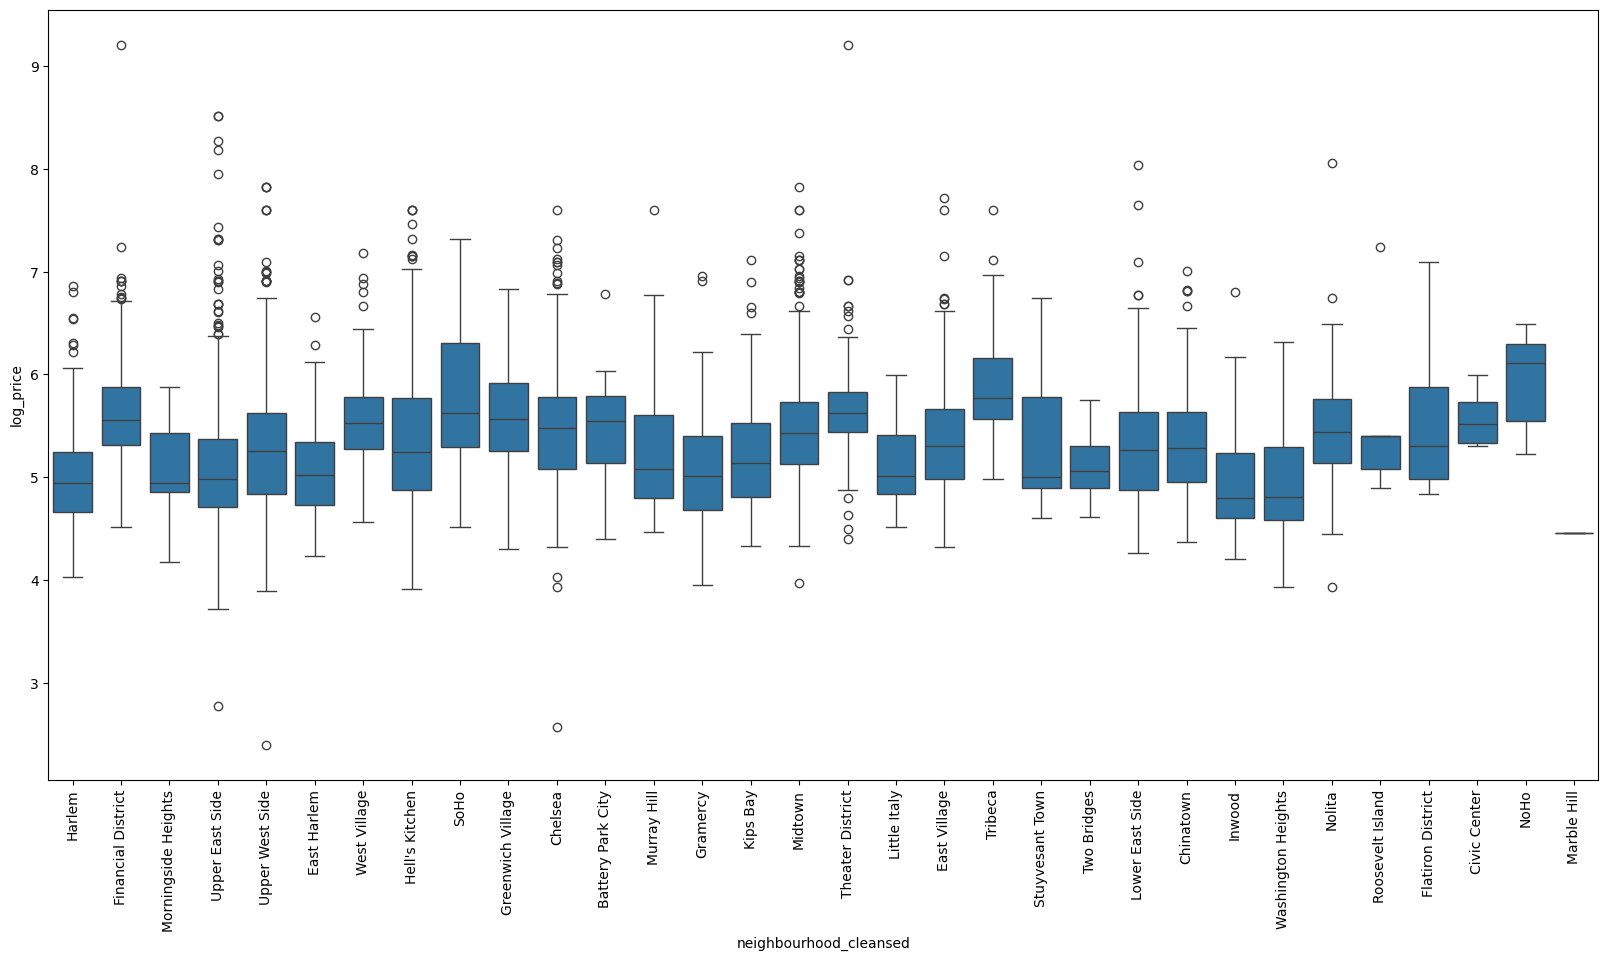

In [37]:
# Let's look at the distribution of prices by neighbourhood 
plt.figure(figsize=(20,10))
sns.boxplot(x='neighbourhood_cleansed', y='log_price', data=listings)
plt.xticks(rotation=90)


/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_8381/500694914.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='log_price', hue='neighbourhood_cleansed', data=listings, fill=True)


(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 [Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11')])

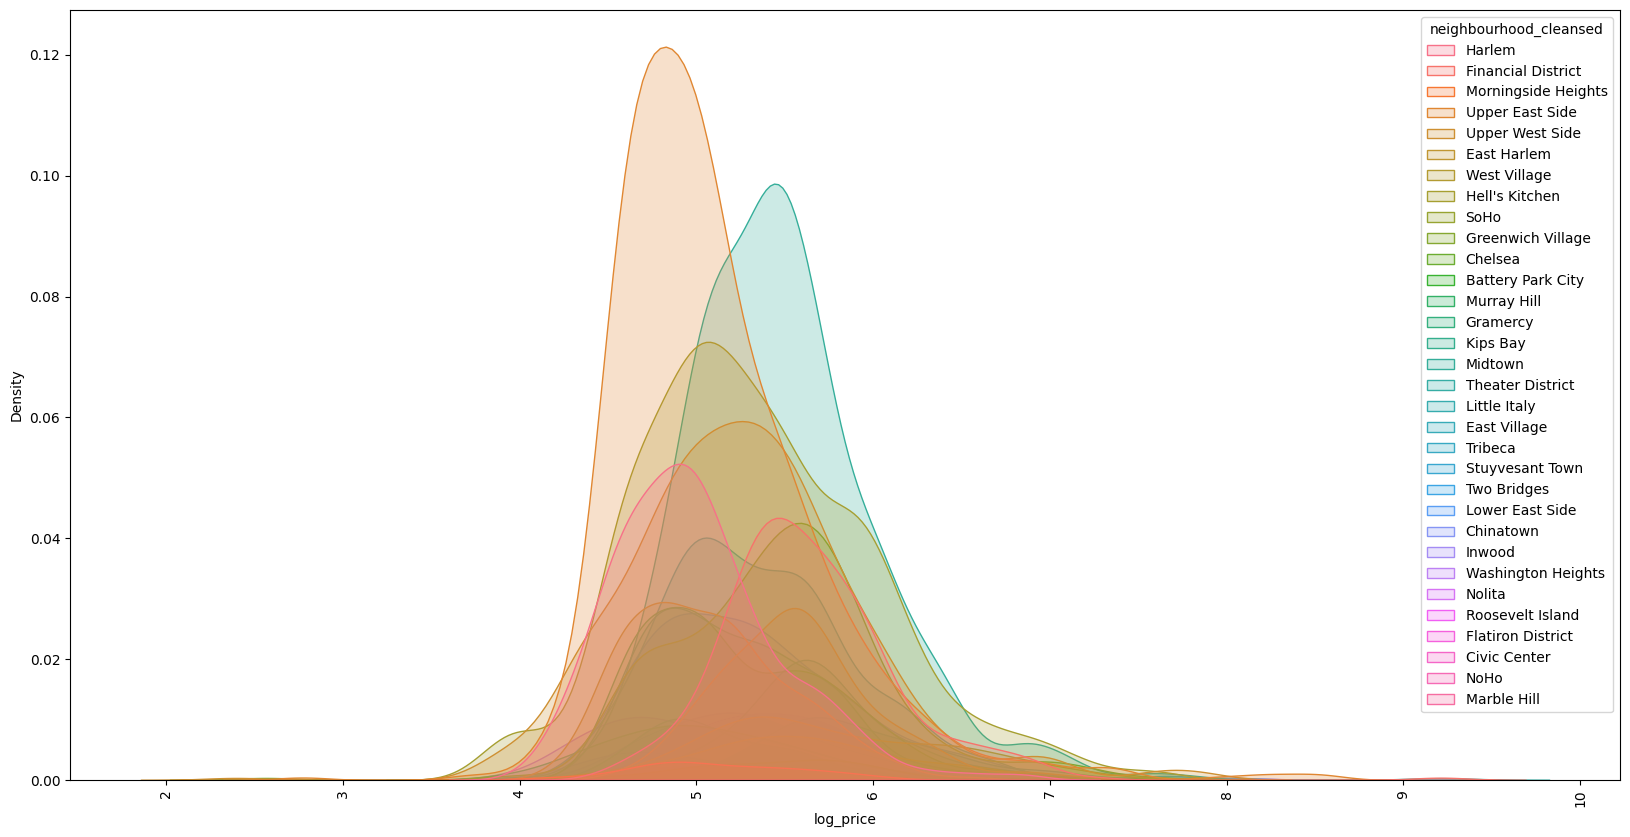

In [38]:
# Let's look at a density plot to see the distribution of log_price for each neighbourhood 
plt.figure(figsize=(20,10))
sns.kdeplot(x='log_price', hue='neighbourhood_cleansed', data=listings, fill=True)
plt.xticks(rotation=90)

In [39]:
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Upper East Side        898
Midtown                767
Hell's Kitchen         752
Upper West Side        597
Harlem                 372
Chelsea                364
East Village           350
Financial District     307
Lower East Side        256
Murray Hill            237
Kips Bay               232
East Harlem            231
West Village           191
Theater District       127
SoHo                   110
Chinatown               97
Nolita                  94
Washington Heights      92
Gramercy                86
Tribeca                 80
Greenwich Village       70
Little Italy            64
Inwood                  35
Battery Park City       29
Flatiron District       27
Morningside Heights     24
Stuyvesant Town         20
NoHo                    11
Two Bridges              9
Civic Center             7
Roosevelt Island         5
Marble Hill              1
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Upper East Side'),
  Text(1, 0, 'Midtown'),
  Text(2, 0, "Hell's Kitchen"),
  Text(3, 0, 'Upper West Side'),
  Text(4, 0, 'Harlem'),
  Text(5, 0, 'Chelsea'),
  Text(6, 0, 'East Village'),
  Text(7, 0, 'Financial District'),
  Text(8, 0, 'Lower East Side'),
  Text(9, 0, 'Murray Hill'),
  Text(10, 0, 'Kips Bay'),
  Text(11, 0, 'East Harlem'),
  Text(12, 0, 'West Village'),
  Text(13, 0, 'Theater District'),
  Text(14, 0, 'SoHo'),
  Text(15, 0, 'Chinatown'),
  Text(16, 0, 'Nolita'),
  Text(17, 0, 'Washington Heights'),
  Text(18, 0, 'Gramercy'),
  Text(19, 0, 'Tribeca'),
  Text(20, 0, 'Greenwich Village'),
  Text(21, 0, 'Little Italy'),
  Text(22, 0, 'Inwood'),
  Text(23, 0, 'Battery Park City'),
  Text(24, 0, 'Flatiron District'),
  Text(25, 0, 'Morningside Heights'),
  Text(26, 0, 'Stuyvesant 

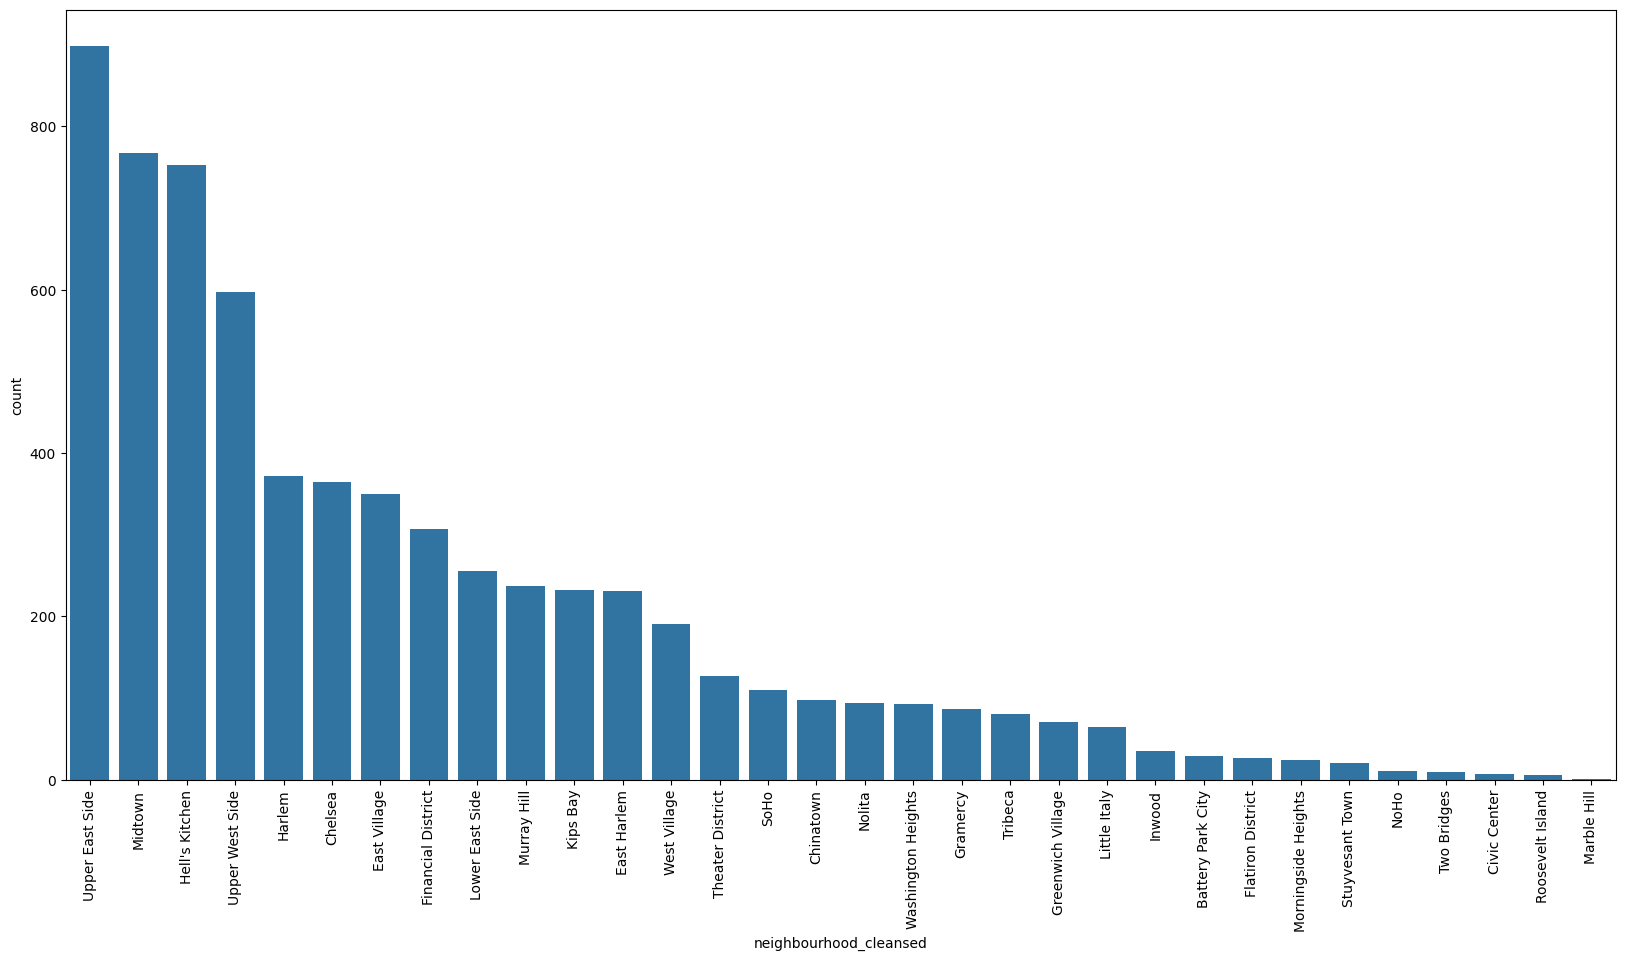

In [40]:
# let's look at the distribution of the number of listings by neighbourhood and sort the plot by the number of listings
plt.figure(figsize=(20,10))
sns.countplot(x='neighbourhood_cleansed', data=listings, order=listings['neighbourhood_cleansed'].value_counts().index)
plt.xticks(rotation=90)

In [41]:
# Calculate the average price by neighbourhood
average_price = listings.groupby('neighbourhood_cleansed')['price'].mean()

average_price = average_price.sort_values(ascending=False)

average_price

neighbourhood_cleansed
Roosevelt Island       426.600000
Tribeca                425.962500
NoHo                   404.000000
SoHo                   393.736364
Theater District       390.322835
Financial District     342.123779
Greenwich Village      307.414286
West Village           289.879581
Nolita                 288.031915
Flatiron District      286.518519
Midtown                282.371578
Chelsea                282.093407
Battery Park City      270.965517
Civic Center           268.142857
Hell's Kitchen         262.853723
East Village           252.308571
Lower East Side        251.726562
Chinatown              251.711340
Upper West Side        247.319933
Stuyvesant Town        243.950000
Murray Hill            223.628692
Upper East Side        214.556793
Kips Bay               211.534483
Gramercy               193.406977
Morningside Heights    181.333333
Two Bridges            178.444444
Little Italy           176.625000
East Harlem            174.536797
Inwood                 17

In [42]:
# Now make a table of the average price in one column and the number of listings of that neighborhood in the other, and the range of prices in the third
average_price = pd.DataFrame(average_price)

average_price['number_of_listings'] = listings['neighbourhood_cleansed'].value_counts()

average_price['price_range'] = listings.groupby('neighbourhood_cleansed')['price'].agg(lambda x: x.max() - x.min())

average_price

,price,number_of_listings,price_range
neighbourhood_cleansed,,,
Roosevelt Island,426.600000,5,1267.0
Tribeca,425.962500,80,1855.0
NoHo,404.000000,11,475.0
SoHo,393.736364,110,1410.0
Theater District,390.322835,127,9919.0
Financial District,342.123779,307,9910.0
Greenwich Village,307.414286,70,853.0
West Village,289.879581,191,1219.0
Nolita,288.031915,94,3093.0


<Axes: xlabel='number_of_listings', ylabel='price'>

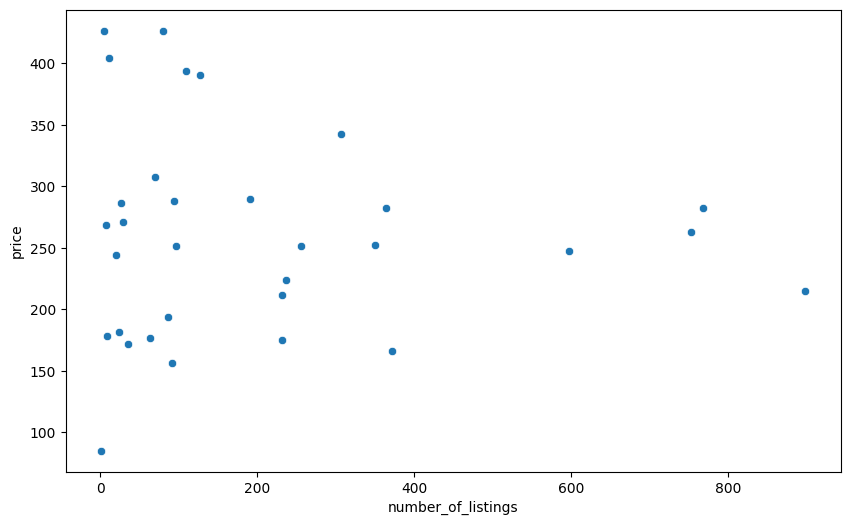

In [43]:
# Scatter plot of average price by neighborhood vs number of listings by neighborhood
plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_listings', y='price', data=average_price)

<Axes: xlabel='price_range', ylabel='price'>

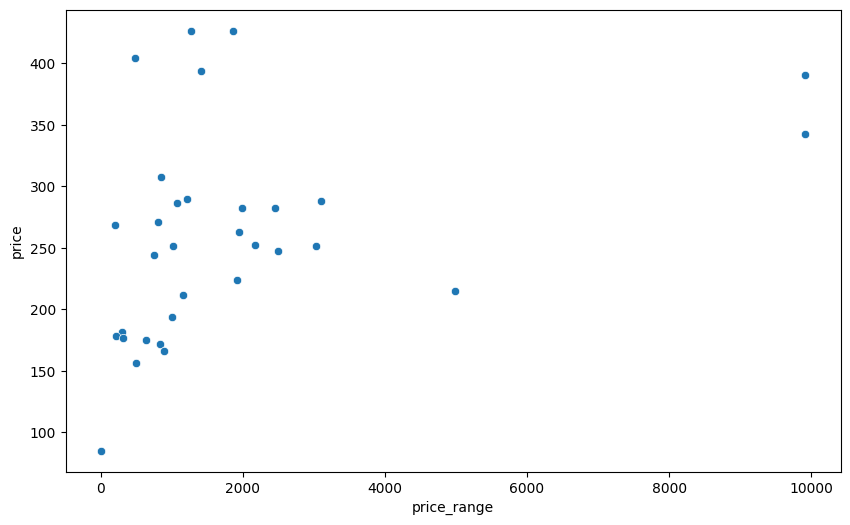

In [44]:
# Scatter plot of average price by neighborhood vs price range by neighborhood
plt.figure(figsize=(10,6))
sns.scatterplot(x='price_range', y='price', data=average_price)

<Axes: xlabel='number_of_listings', ylabel='price_range'>

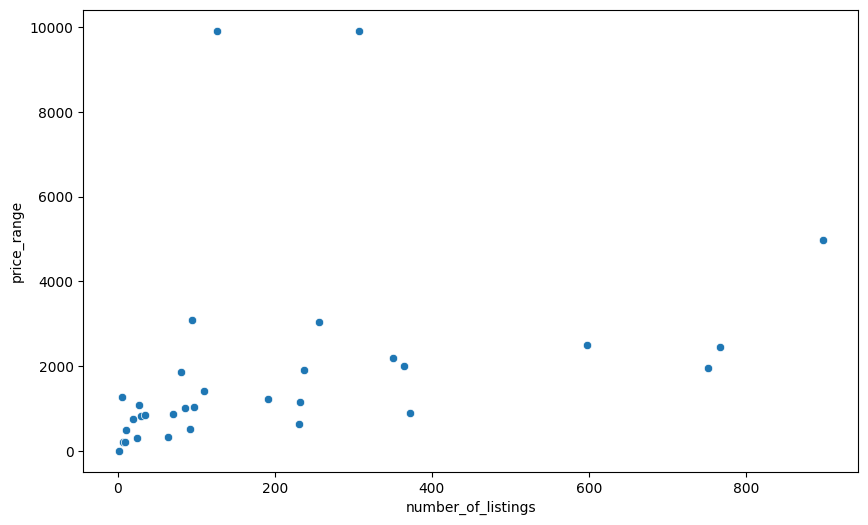

In [45]:
# Scatter plot of price range by neighborhood vs number of listings by neighborhood
plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_listings', y='price_range', data=average_price)


In [46]:
# Let's do an ANOVA test to see if there is a significant difference in price between the neighborhoods
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('log_price ~ C(neighbourhood_cleansed)', data=listings).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(neighbourhood_cleansed),281.021790,31.0,28.641529,2.218885e-155
Residual,2060.454804,6510.0,NaN,NaN


In [47]:
# We can see there is a significant difference in price between the neighborhoods. Let's do a Tukey HSD test to see which neighborhoods are significantly different from each other
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=listings['log_price'], groups=listings['neighbourhood_cleansed'], alpha=0.05)
tukey.summary()

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


group1,group2,meandiff,p-adj,lower,upper,reject
Battery Park City,Chelsea,-0.0282,1.0,-0.4388,0.3823,False
Battery Park City,Chinatown,-0.1382,1.0,-0.5885,0.3121,False
Battery Park City,Civic Center,0.079,1.0,-0.817,0.975,False
Battery Park City,East Harlem,-0.4222,0.0455,-0.8414,-0.0031,True
Battery Park City,East Village,-0.123,1.0,-0.5342,0.2881,False
Battery Park City,Financial District,0.1501,1.0,-0.2632,0.5634,False
Battery Park City,Flatiron District,-0.0135,1.0,-0.5825,0.5555,False
Battery Park City,Gramercy,-0.4082,0.1723,-0.8651,0.0487,False
Battery Park City,Greenwich Village,0.0881,1.0,-0.3817,0.558,False
Battery Park City,Harlem,-0.494,0.0023,-0.9042,-0.0837,True


In [48]:
# Convert the HSD test results to a dataframe
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

# Convert 'reject; column to a boolean
tukey_df['reject'] = tukey_df['reject'].astype(bool)

# Filter the dataframe to only show the significant differences
sig_dif = tukey_df[tukey_df['reject'] == True]

# Calculate the absolute mean difference in price between the neighborhoods
sig_dif['abs_meandiff'] = sig_dif['meandiff'].abs()

# Sort the dataframe by the absolute mean difference in price
sig_dif = sig_dif.sort_values(by='abs_meandiff', ascending=False)

sig_dif

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_8381/3158972441.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_dif['abs_meandiff'] = sig_dif['meandiff'].abs()


,group1,group2,meandiff,p-adj,lower,upper,reject,abs_meandiff
484,Tribeca,Washington Heights,-0.9797,0.0000,-1.3050,-0.6545,True,0.9797
439,NoHo,Washington Heights,-0.9732,0.0000,-1.6520,-0.2944,True,0.9732
319,Inwood,Tribeca,0.9622,0.0000,0.5310,1.3934,True,0.9622
313,Inwood,NoHo,0.9557,0.0004,0.2202,1.6912,True,0.9557
280,Harlem,Tribeca,0.9219,0.0000,0.6597,1.1842,True,0.9219
...,...,...,...,...,...,...,...,...
35,Chelsea,Financial District,0.1783,0.0162,0.0135,0.3432,True,0.1783
361,Lower East Side,Midtown,0.1729,0.0082,0.0194,0.3265,True,0.1729
490,Upper East Side,Upper West Side,0.1581,0.0001,0.0457,0.2704,True,0.1581
291,Hell's Kitchen,Midtown,0.1561,0.0000,0.0469,0.2653,True,0.1561


/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_8381/159841981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_sig_dif['pairs'] = top_20_sig_dif['group1'] + ' - ' + top_20_sig_dif['group2']


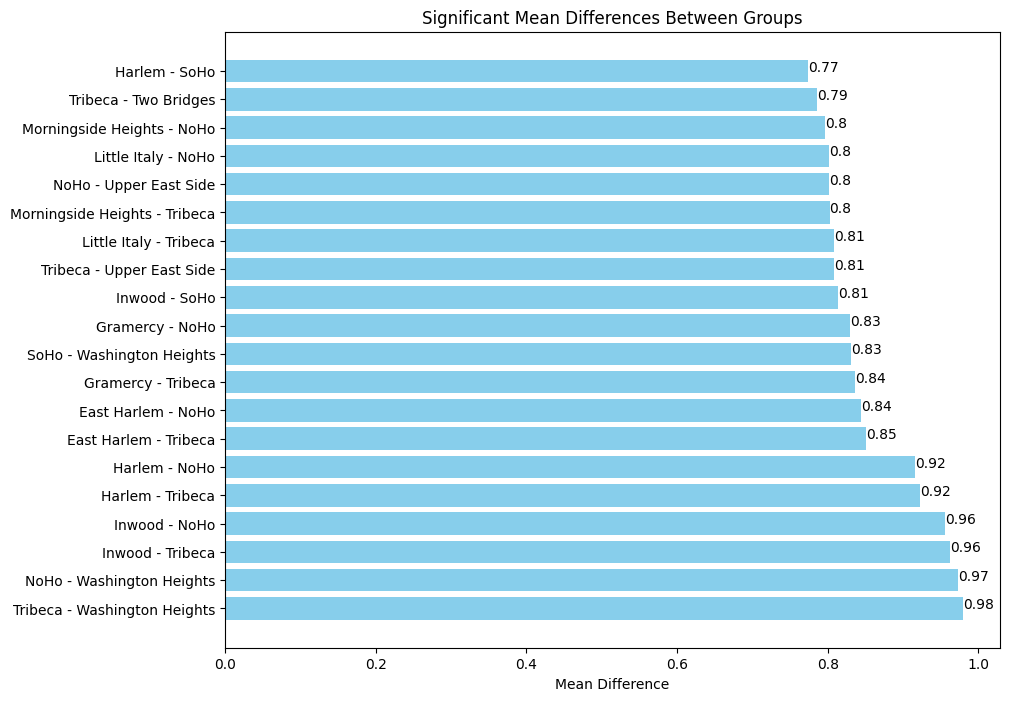

In [49]:
# Save the top 20 significant differences to new df
top_20_sig_dif = sig_dif.head(20)

# Create a new column called 'pairs' that combines the group1 and group2 columns
top_20_sig_dif['pairs'] = top_20_sig_dif['group1'] + ' - ' + top_20_sig_dif['group2']

# Create a barhplot of the absolute mean difference in price between the neighborhoods
plt.figure(figsize=(10,len(top_20_sig_dif) * 0.4))
plt.barh(top_20_sig_dif['pairs'], top_20_sig_dif['abs_meandiff'], color="skyblue")

# Add value labels to each bar
for index, value in enumerate(top_20_sig_dif['abs_meandiff']):
    plt.text(value, index, str(round(value, 2)))

plt.xlabel('Mean Difference')
plt.title('Significant Mean Differences Between Groups')
plt.show()

In [50]:
%pip install geopy

/Applications/freesurfer/SetUpFreeSurfer.csh: No such file or directory.
Note: you may need to restart the kernel to use updated packages.


In [51]:
# Let's calculate "distance to city center" using the latitude and longitude columns
from geopy.distance import geodesic

city_center_coordinates = (40.776676, -73.971321)
listings['distance_to_city_center'] = listings.apply(lambda x: geodesic(city_center_coordinates, (x['latitude'], x['longitude'])).miles, axis=1)

<Axes: xlabel='distance_to_city_center', ylabel='log_price'>

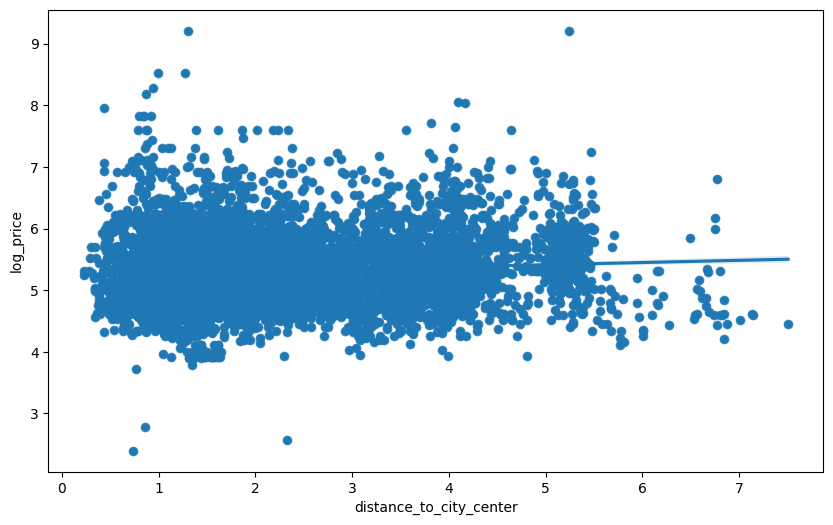

In [52]:
# scatter plot of distance to city center vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance_to_city_center', y='log_price', data=listings)

# Add a regression line to the scatter plot
sns.regplot(x='distance_to_city_center', y='log_price', data=listings)

For n_clusters = 2 The average silhouette_score is : 0.5290090170507579
For n_clusters = 3 The average silhouette_score is : 0.4583120653131488
For n_clusters = 4 The average silhouette_score is : 0.4594697968646652
For n_clusters = 5 The average silhouette_score is : 0.4319204876878054
For n_clusters = 6 The average silhouette_score is : 0.38925510909023364
For n_clusters = 7 The average silhouette_score is : 0.42275968286351784
For n_clusters = 8 The average silhouette_score is : 0.4504919078627763
For n_clusters = 9 The average silhouette_score is : 0.4763037125595214
For n_clusters = 10 The average silhouette_score is : 0.47745334799988615
For n_clusters = 11 The average silhouette_score is : 0.48826255933118223
For n_clusters = 12 The average silhouette_score is : 0.4761381347179741
For n_clusters = 13 The average silhouette_score is : 0.45338601740997375
For n_clusters = 14 The average silhouette_score is : 0.4552405418132615


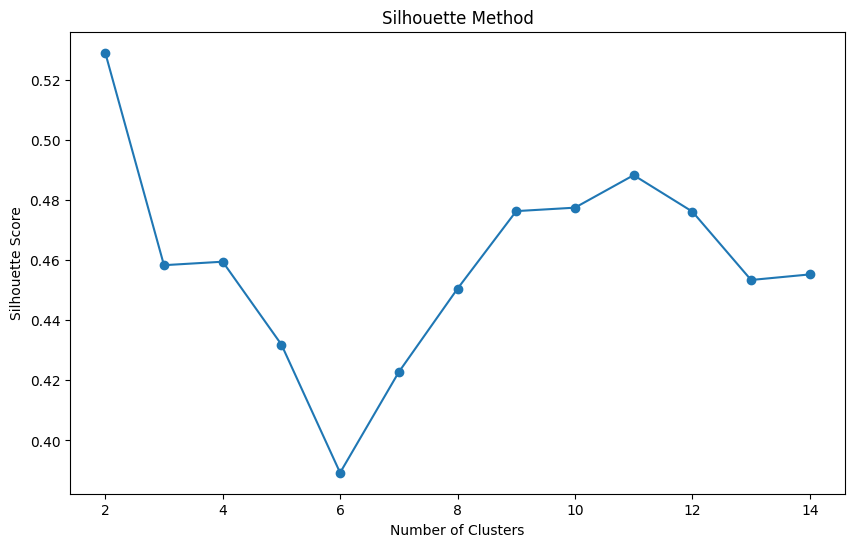

In [54]:
# Try the silhouette method for optimal k-means clusters based on latitude and longitude 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame and it has columns 'latitude' and 'longitude'
X = listings[['latitude', 'longitude']]

silhouette_scores = []  # List to hold silhouette scores
range_n_clusters = list(range(2,15))  # List of cluster numbers to try

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [56]:
# Let's go with 2 clusters and save this as a new dataframe 

# Run a kmeans 

listings_two_cluster = listings.copy()

kmeans = KMeans(n_clusters=2, random_state=10)
listings_two_cluster['cluster'] = kmeans.fit_predict(X)

In [59]:
# Let's also try a K-means with 11 clusters

listings_eleven_cluster = listings.copy()
kmeans = KMeans(n_clusters=11, random_state=10)
listings_eleven_cluster['cluster'] = kmeans.fit_predict(X)

In [60]:
listings_eleven_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6542 entries, 11 to 39051
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6542 non-null   int64  
 1   neighbourhood_cleansed       6542 non-null   object 
 2   latitude                     6542 non-null   float64
 3   longitude                    6542 non-null   float64
 4   accommodates                 6542 non-null   int64  
 5   bathrooms                    6542 non-null   float64
 6   bedrooms                     6542 non-null   float64
 7   beds                         6542 non-null   float64
 8   amenities                    6542 non-null   object 
 9   price                        6542 non-null   float64
 10  number_of_reviews            6542 non-null   int64  
 11  review_scores_rating         6542 non-null   float64
 12  review_scores_accuracy       6542 non-null   float64
 13  review_scores_cleanli

In [61]:
listings_eleven_cluster = listings_eleven_cluster[['accommodates','bathrooms','bedrooms','beds','number_of_reviews','log_price','distance_to_city_center','cluster']]

In [72]:
# Is there multicollinearity? Let's take a look at VIF scores

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = listings_eleven_cluster.drop('log_price', axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,accommodates,15.171794
1,bathrooms,8.775819
2,bedrooms,5.970147
3,beds,12.691688
4,number_of_reviews,1.182251
5,distance_to_city_center,3.270108
6,cluster,2.999899


In [64]:
# Train test split 
from sklearn.model_selection import train_test_split

X = listings_eleven_cluster.drop('log_price', axis=1)
y = listings_eleven_cluster['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Scale the numerical data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale numerical variables 
X_train_scaled = scaler.fit_transform(X_train[['accommodates','bathrooms','bedrooms','beds','number_of_reviews','distance_to_city_center']])

In [65]:
# Scale y_train
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))

In [68]:
# One-hot-encode the cluster column

X_train_cluster = pd.get_dummies(X_train['cluster'], prefix='cluster')

# Concatenate the scaled numerical variables and the one-hot-encoded cluster column
X_train_final = np.concatenate([X_train_scaled, X_train_cluster], axis=1)

In [71]:
# Multiple linear regression on training data 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train_final, y_train_scaled)

# Evaluate the model on the training data using R2, MAE, and MSE

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the training data

y_train_pred = lm.predict(X_train_final)

# Calculate R2, MAE, and MSE

r2_train = r2_score(y_train_scaled, y_train_pred)
mae_train = mean_absolute_error(y_train_scaled, y_train_pred)
mse_train = mean_squared_error(y_train_scaled, y_train_pred)

print(f'R2 on training data: {r2_train}')
print(f'MAE on training data: {mae_train}')
print(f'MSE on training data: {mse_train}')



R2 on training data: 0.3382828970045063
MAE on training data: 0.6148239578144072
MSE on training data: 0.6617171029954934


In [73]:
# Random forest regressor on training data and evaluate with R2, MAE, MSE

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=10)

rf.fit(X_train_final, y_train_scaled)

# Make predictions on the training data

y_train_pred_rf = rf.predict(X_train_final)

# Calculate R2, MAE, and MSE

r2_train_rf = r2_score(y_train_scaled, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train_scaled, y_train_pred_rf)
mse_train_rf = mean_squared_error(y_train_scaled, y_train_pred_rf)

print(f'R2 on training data: {r2_train_rf}')
print(f'MAE on training data: {mae_train_rf}')
print(f'MSE on training data: {mse_train_rf}')


/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 on training data: 0.9150559185758087
MAE on training data: 0.20620612419714499
MSE on training data: 0.08494408142419127


In [75]:
# Let's do cross-validation on this model 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train_final, y_train_scaled, scoring='r2', cv=10)

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was exp

In [77]:
np.mean(scores)

0.40020621337380946

In [78]:
listings_two_cluster = listings_two_cluster[['accommodates','bathrooms','bedrooms','beds','number_of_reviews','log_price','distance_to_city_center','cluster']]

In [79]:
X = listings_two_cluster.drop('log_price', axis=1)
y = listings_two_cluster['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()

# Scale numerical variables 
X_train_scaled = scaler.fit_transform(X_train[['accommodates','bathrooms','bedrooms','beds','number_of_reviews','distance_to_city_center']])

In [80]:
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))

In [81]:

X_train_cluster = pd.get_dummies(X_train['cluster'], prefix='cluster')

# Concatenate the scaled numerical variables and the one-hot-encoded cluster column
X_train_final = np.concatenate([X_train_scaled, X_train_cluster], axis=1)

In [82]:
rf = RandomForestRegressor(random_state=10)

rf.fit(X_train_final, y_train_scaled)

# Make predictions on the training data

y_train_pred_rf = rf.predict(X_train_final)

# Calculate R2, MAE, and MSE

r2_train_rf = r2_score(y_train_scaled, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train_scaled, y_train_pred_rf)
mse_train_rf = mean_squared_error(y_train_scaled, y_train_pred_rf)

print(f'R2 on training data: {r2_train_rf}')
print(f'MAE on training data: {mae_train_rf}')
print(f'MSE on training data: {mse_train_rf}')

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 on training data: 0.9101370672228803
MAE on training data: 0.21276684222540657
MSE on training data: 0.08986293277711958


In [83]:
scores = cross_val_score(rf, X_train_final, y_train_scaled, scoring='r2', cv=10)

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was exp

In [84]:
np.mean(scores)

0.3654394487082223

In [85]:
# Load the facilities dataset, and merge it with the listings dataset on ID
facilities = pd.read_csv('/Users/tonymoceri/MSBDSA/CSE_Project/saved_datasets/total_facilities_count_0.5.csv')

# Merge facilities with listings on ID
listings = listings.merge(facilities, on='id', how='inner')

In [86]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6087 entries, 0 to 6086
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6087 non-null   int64  
 1   neighbourhood_cleansed       6087 non-null   object 
 2   latitude                     6087 non-null   float64
 3   longitude                    6087 non-null   float64
 4   accommodates                 6087 non-null   int64  
 5   bathrooms                    6087 non-null   float64
 6   bedrooms                     6087 non-null   float64
 7   beds                         6087 non-null   float64
 8   amenities                    6087 non-null   object 
 9   price                        6087 non-null   float64
 10  number_of_reviews            6087 non-null   int64  
 11  review_scores_rating         6087 non-null   float64
 12  review_scores_accuracy       6087 non-null   float64
 13  review_scores_clea

In [87]:
# Make a column for total facilities that adds up all of the "nearby" columns
listings['total_facilities'] = listings['nearby_parks_count'] + listings['nearby_hs_count'] + listings['nearby_transport_count'] + listings['nearby_dc_count'] + listings['nearby_hc_count'] + listings['nearby_cultural_count'] + listings['nearby_library_count'] + listings['nearby_emergency_count'] + listings['nearby_office_count'] + listings['nearby_res_count'] + listings['nearby_pubs_count']

<Axes: xlabel='total_facilities', ylabel='log_price'>

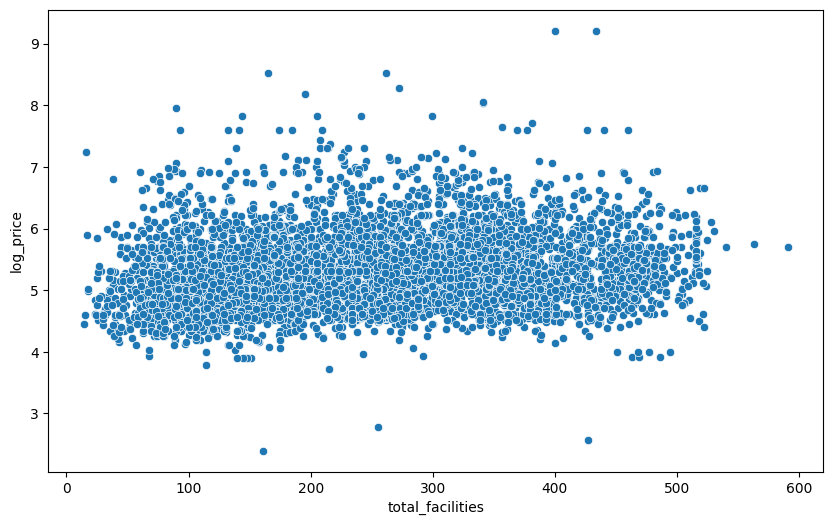

In [88]:
# Scatter plot of log_price vs. total facilities column
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_facilities', y='log_price', data=listings)

In [89]:
# Is there a correlation between total facilities and price?
listings[['log_price', 'total_facilities']].corr()

,log_price,total_facilities
log_price,1.00000,0.13854
total_facilities,0.13854,1.00000


In [90]:
# How about price and distance to city center?
listings[['log_price', 'distance_to_city_center']].corr()

,log_price,distance_to_city_center
log_price,1.000000,0.075072
distance_to_city_center,0.075072,1.000000


In [91]:
# Let's look at the correlation between log_price and all other independent numerical variables
listings_num = listings.select_dtypes(include=[np.number])
correlation = listings_num.corr()
correlation['log_price'].sort_values(ascending=False)

log_price                      1.000000
price                          0.726983
bathrooms                      0.407886
bedrooms                       0.397218
accommodates                   0.351081
beds                           0.259109
nearby_hs_count                0.189063
nearby_cultural_count          0.167423
nearby_office_count            0.162599
id                             0.156038
total_facilities               0.138540
reviews_per_month              0.125951
review_scores_value            0.114139
review_scores_cleanliness      0.113850
nearby_pubs_count              0.102755
nearby_parks_count             0.102465
nearby_res_count               0.100064
review_scores_location         0.097445
review_scores_rating           0.094940
review_scores_accuracy         0.076722
distance_to_city_center        0.075072
review_scores_communication    0.067912
nearby_library_count           0.063320
review_scores_checkin          0.046515
nearby_emergency_count         0.046183


In [92]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6087 entries, 0 to 6086
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6087 non-null   int64  
 1   neighbourhood_cleansed       6087 non-null   object 
 2   latitude                     6087 non-null   float64
 3   longitude                    6087 non-null   float64
 4   accommodates                 6087 non-null   int64  
 5   bathrooms                    6087 non-null   float64
 6   bedrooms                     6087 non-null   float64
 7   beds                         6087 non-null   float64
 8   amenities                    6087 non-null   object 
 9   price                        6087 non-null   float64
 10  number_of_reviews            6087 non-null   int64  
 11  review_scores_rating         6087 non-null   float64
 12  review_scores_accuracy       6087 non-null   float64
 13  review_scores_clea

In [93]:
# Drop the id, neighbourhood_cleansed, latitude, longitude, amenities, price, and loc_clusters columns
listings = listings.drop(['id','latitude','longitude','amenities','price'], axis=1)

In [94]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6087 entries, 0 to 6086
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   neighbourhood_cleansed       6087 non-null   object 
 1   accommodates                 6087 non-null   int64  
 2   bathrooms                    6087 non-null   float64
 3   bedrooms                     6087 non-null   float64
 4   beds                         6087 non-null   float64
 5   number_of_reviews            6087 non-null   int64  
 6   review_scores_rating         6087 non-null   float64
 7   review_scores_accuracy       6087 non-null   float64
 8   review_scores_cleanliness    6087 non-null   float64
 9   review_scores_checkin        6087 non-null   float64
 10  review_scores_communication  6087 non-null   float64
 11  review_scores_location       6087 non-null   float64
 12  review_scores_value          6087 non-null   float64
 13  reviews_per_month 

In [169]:
listings_model = listings.copy()

In [170]:
# Have to drop any value from neighbourhood_cleansed that has less than 2 listings 
listings_model = listings_model.groupby('neighbourhood_cleansed').filter(lambda x: len(x) > 1)

In [171]:
# Drop rows with NaN 'neighbourhood_cleansed' values
listings_model = listings_model.dropna(subset=['neighbourhood_cleansed'])

# Reset the index of your DataFrame
listings_model = listings_model.reset_index(drop=True)

In [172]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(listings_model, listings_model['neighbourhood_cleansed']):
    train_set = listings_model.loc[train_index]
    test_set = listings_model.loc[test_index]

In [173]:
# one-hot encode the neighborhood_cleansed variable and have them be 1s and 0s instead of False and True
train_set = pd.get_dummies(train_set, columns=['neighbourhood_cleansed'])
test_set = pd.get_dummies(test_set, columns=['neighbourhood_cleansed'])

In [174]:
# For the neighborhood_cleansed one-hot-encoded columns, convert the True and False to 1s and 0s
# Assuming 'df' is your DataFrame and 'neighborhood_cleansed' is the prefix for your one-hot-encoded columns
for column in train_set.columns:
    if 'neighbourhood_cleansed' in column:
        train_set[column] = train_set[column].astype(int)

for column in test_set.columns:
    if 'neighbourhood_cleansed' in column:
        test_set[column] = test_set[column].astype(int)

In [175]:
from sklearn.preprocessing import StandardScaler

# Create a new scaler for the 'log_price' column
price_scaler = StandardScaler()

# Fit the scaler on the 'log_price' data in the training set
price_scaler.fit(train_set['log_price'].values.reshape(-1, 1))

# Scale the 'log_price' column in the training and test sets
train_set['log_price'] = price_scaler.transform(train_set['log_price'].values.reshape(-1, 1))
test_set['log_price'] = price_scaler.transform(test_set['log_price'].values.reshape(-1, 1))

# Create another scaler for the rest of the numerical columns
scaler = StandardScaler()

# Get the numerical columns excluding 'log_price'
numerical_columns = listings_model.select_dtypes(include=[np.number]).columns.drop('log_price')

# Fit the scaler on the numerical data in the training set
scaler.fit(train_set[numerical_columns])

# Scale the numerical columns in the training and test sets
train_set[numerical_columns] = scaler.transform(train_set[numerical_columns])
test_set[numerical_columns] = scaler.transform(test_set[numerical_columns])

In [176]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4868 entries, 904 to 2041
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   accommodates                                4868 non-null   float64
 1   bathrooms                                   4868 non-null   float64
 2   bedrooms                                    4868 non-null   float64
 3   beds                                        4868 non-null   float64
 4   number_of_reviews                           4868 non-null   float64
 5   review_scores_rating                        4868 non-null   float64
 6   review_scores_accuracy                      4868 non-null   float64
 7   review_scores_cleanliness                   4868 non-null   float64
 8   review_scores_checkin                       4868 non-null   float64
 9   review_scores_communication                 4868 non-null   float64
 10  review_scores_l

In [177]:
# Get VIF scores for the features 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the features
X = train_set.drop('log_price', axis=1)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
16,nearby_transport_count,inf
22,nearby_office_count,inf
19,nearby_cultural_count,inf
18,nearby_hc_count,inf
17,nearby_dc_count,inf
15,nearby_hs_count,inf
14,nearby_parks_count,inf
21,nearby_emergency_count,inf
20,nearby_library_count,inf
23,nearby_res_count,inf


In [178]:
# Create a list, features, that contains all columns except ones that start with "neighbourhood" and "nearby" 

features = [column for column in train_set.columns if not column.startswith('neighbourhood') and not column.startswith('nearby')]

In [179]:
# Also drop log_price from features 

features.remove('log_price')

In [180]:
features

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'distance_to_city_center',
 'total_facilities']

In [181]:
# Let's run a multiple linear regression model with the features that have a VIF score less than 22
import statsmodels.api as sm

X = train_set[features]
y = train_set['log_price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     130.8
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:06:33   Log-Likelihood:                -6080.9
No. Observations:                4868   AIC:                         1.219e+04
Df Residuals:                    4852   BIC:                         1.230e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        5.256e-16      0.012   4.34e-14      1.000      -0.024       0.024
accommodates                    0.1732      0.020      8.465      0.000       0.133       0.213
bathrooms                       0.2634      0.014     18.661      0.000       0.236       0.291
bedrooms                        0.2483      0.018     13.943      0.000       0.213       0.283
beds                           -0.1304      0.020     -6.565      0.000      -0.169      -0.091
number_of_reviews              -0.0604      0.016     -3.821      0.000      -0.091      -0.029
review_scores_rating           -0.0188      0.031     -0.615      0.539      -0.079       0.041
review_scores_accuracy         -0.0214      0.024     -0.901      0.368      -0.068       0.025
review_scores_cleanliness       0.0727      0.020      3.588      0.000       0.033       0.112
review_scores_checkin          -0.0415      0.018     -2.366      0.018      -0.076      -0.007
review_scores_communication    -0.0062      0.021     -0.302      0.762      -0.047       0.034
review_scores_location          0.0581      0.016      3.601      0.000       0.026       0.090
review_scores_value             0.0673      0.022      2.992      0.003       0.023       0.111
reviews_per_month               0.1178      0.016      7.488      0.000       0.087       0.149
distance_to_city_center         0.0717      0.012      5.768      0.000       0.047       0.096
total_facilities                0.1470      0.012     11.789      0.000       0.123       0.171
==============================================================================
Omnibus:                      758.603   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3145.185
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                       6.668   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# Let's run a random forest regressor model on the data
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Get the target variable
y_train = train_set['log_price']

# Get the features
X_train = train_set[features]


X_test = test_set[features]
y_test = test_set['log_price']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [183]:
X_train

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_to_city_center,total_facilities
904,0.517274,-0.392086,0.946146,0.412342,-0.359667,-8.878532,-4.148904,-6.178111,-10.671874,-6.724064,-11.235223,-7.464759,-0.405755,0.915312,-1.262698
524,-0.810132,-0.392086,-1.359750,-0.785563,-0.377515,0.009460,0.004452,0.006663,-0.003757,0.013002,0.005286,0.015337,0.006161,-0.357250,-1.511831
1666,-0.146429,-0.392086,-0.206802,-0.785563,-0.020554,0.657783,0.703677,0.858855,0.454046,0.583950,0.615277,1.059364,0.284820,0.590363,-0.695707
1626,-0.146429,-0.392086,-1.359750,0.412342,-0.252579,-0.259634,0.000052,-0.806560,-0.221960,0.242909,0.200509,-0.155324,-0.568982,-0.109952,1.005268
3534,0.517274,-0.392086,-0.206802,0.412342,-0.359667,0.778496,0.703677,0.858855,0.594880,0.583950,0.615277,1.059364,-0.135803,-0.487858,1.872936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1.180976,-0.392086,0.946146,0.412342,-0.377515,0.009460,0.004452,0.006663,-0.003757,0.013002,0.005286,0.015337,0.006161,-0.915384,-1.322833
2541,-0.810132,-0.392086,-0.206802,-0.785563,-0.323971,0.778496,0.703677,0.858855,0.594880,0.583950,0.615277,1.059364,-0.455979,-0.852091,-0.850341
6022,-0.810132,-0.392086,-0.206802,-0.785563,0.425648,-0.259634,-0.557994,-0.055950,-0.024792,0.315989,0.348641,-0.006152,1.326961,-0.851935,0.171962
3847,3.172084,4.759538,3.252041,2.808154,3.727541,-0.018209,-0.024211,0.108246,-0.024792,-0.049411,-0.866036,0.292193,2.136818,-0.211628,-1.176790


In [184]:
# let's evaluate the model on the training data and see how it performs before testing it. Let's also get a view of feature importance scores 
y_train_pred = rf.predict(X_train)
forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_train, y_train_pred)

print(f'Training RMSE: {forest_rmse}', f'Training R^2: {forest_r2}', sep='\n')


Training RMSE: 0.29296002967030155
Training R^2: 0.914174421015576


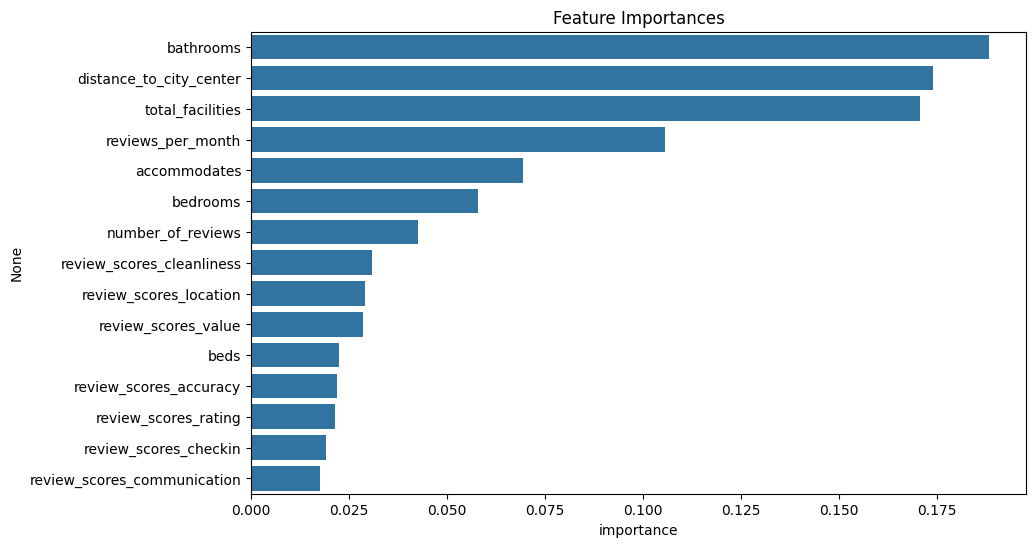

In [185]:
# Feature importance scores
feature_importances = rf.feature_importances_
feature_importances

# Get the feature importances and sort them in descending order
feature_importances = pd.DataFrame(feature_importances, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

In [186]:
# Let's run this model on the test set 

y_test_pred = rf.predict(X_test)
forest_mse = mean_squared_error(y_test, y_test_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, y_test_pred)

print(f'Test RMSE: {forest_rmse}', f'Test R^2: {forest_r2}', sep='\n')

Test RMSE: 0.7727715651086794
Test R^2: 0.39325560077449373


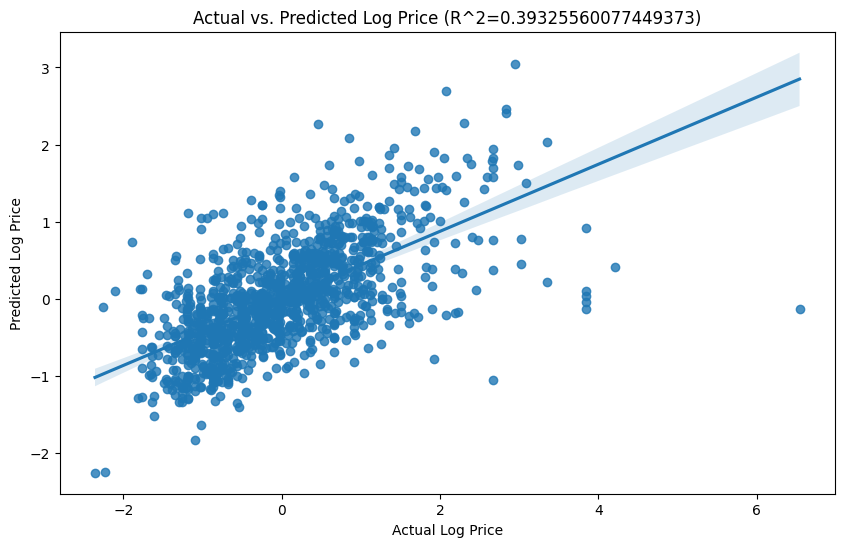

In [187]:
# Let's do an actual value vs. predicted value scatter plot from the predictions made from the test set and add a trend line labeled with the r2 value
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_test_pred)
plt.title(f'Actual vs. Predicted Log Price (R^2={forest_r2})')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.show()

In [ ]:
# Let's do a GridSearchSV to find optimal parameters for Random Forest
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 3500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt']
}

# Create a Grid Search object
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Get the best score
best_score = grid_search.best_score_
print(f'Best score: {best_score}')

In [ ]:
# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 5000, 10000],
    'max_depth': [None, 10, 20, 30, 40, 50, 80, 100, 150, 200],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt']
}

# Create a Grid Search object
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Get the best score
best_score = grid_search.best_score_
print(f'Best score: {best_score}')

In [188]:
# Run a random forest model with the parameters above 

rf_cv = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_leaf=1, random_state=42)

In [189]:
# Fit the model to the training data
rf_cv.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_cv = rf_cv.predict(X_train)

# Calculate R2, MAE, and MSE

r2_train_cv = r2_score(y_train, y_train_pred_cv)
mae_train_cv = mean_absolute_error(y_train, y_train_pred_cv)
mse_train_cv = mean_squared_error(y_train, y_train_pred_cv)

print(f'R2 on training data: {r2_train_cv}')
print(f'MAE on training data: {mae_train_cv}')
print(f'MSE on training data: {mse_train_cv}')

R2 on training data: 0.914174421015576
MAE on training data: 0.20804341005440888
MSE on training data: 0.08582557898442397


In [222]:
# Let's do a cross valiodation of this model 

scores = cross_val_score(rf_cv, X_train, y_train, scoring='r2', cv=10)
np.mean(scores)

0.39596424161493754

In [190]:
# Also test if the model performs better than "Chance"

# Assuming X_train, X_test, y_train, y_test are your train-test data

# Make predictions with your model
rf_predictions = rf_cv.predict(X_test)

# Calculate the sum of absolute errors of your model
rf_error_sum = sum(abs(y_test - rf_predictions))

# Create a baseline model that predicts the mean price for all instances
baseline_predictions = [y_train.mean()] * len(y_test)

# Calculate the sum of absolute errors of the baseline model
baseline_error_sum = sum(abs(y_test - baseline_predictions))

# Compare the two sums
print(f'Sum of absolute errors of the random forest model: {rf_error_sum}')
print(f'Sum of absolute errors of the baseline model: {baseline_error_sum}')

# If the sum of absolute errors of your model is less than that of the baseline model,
# then your model is performing better than chance.
if rf_error_sum < baseline_error_sum:
    print('The random forest model performs better than chance.')
else:
    print('The random forest model does not perform better than chance.')

Sum of absolute errors of the random forest model: 653.3428630027556
Sum of absolute errors of the baseline model: 942.3457819401574
The random forest model performs better than chance.


In [191]:
y_train

904    -1.632612
524    -0.873255
1666    0.728844
1626   -1.018176
3534    0.657807
          ...   
1462   -0.106341
2541   -1.018176
6022   -0.020606
3847    1.355670
2041   -1.262089
Name: log_price, Length: 4868, dtype: float64

In [192]:
# Assuming rf_predictions are your random forest predictions
# and baseline_predictions are your baseline predictions

# Convert your lists to NumPy arrays
rf_predictions_array = np.array(rf_predictions)
baseline_predictions_array = np.array(baseline_predictions)

# Reverse the scaling on the random forest predictions
rf_predictions_inv_scaled = price_scaler.inverse_transform(rf_predictions_array.reshape(-1, 1))

# Now reverse the log transformation
rf_predictions_original = np.expm1(rf_predictions_inv_scaled)

# Do the same for the baseline predictions
baseline_predictions_inv_scaled = price_scaler.inverse_transform(baseline_predictions_array.reshape(-1, 1))
baseline_predictions_original = np.expm1(baseline_predictions_inv_scaled)

# Calculate the sum of the original predictions
rf_predictions_sum = np.sum(rf_predictions_original)
baseline_predictions_sum = np.sum(baseline_predictions_original)

print(f'Sum of original predicted prices from the random forest model: {rf_predictions_sum}')
print(f'Sum of original predicted prices from the baseline model: {baseline_predictions_sum}')

Sum of original predicted prices from the random forest model: 271138.79876004916
Sum of original predicted prices from the baseline model: 246621.18468889402


In [193]:
# Is the difference between the random forest model and baseline model significant? 
diff = rf_predictions_sum - baseline_predictions_sum
diff

24517.61407115514

In [194]:
# divided by the length of the rf_predictions
diff/len(rf_predictions_original)

20.129403999306355

In [195]:
from scipy import stats

# Convert your lists to NumPy arrays
rf_predictions_array = np.array(rf_predictions)
baseline_predictions_array = np.array(baseline_predictions)

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(rf_predictions_array, baseline_predictions_array)

print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

t-statistic: 0.37749024900160755
p-value: 0.7058751294655116


In [196]:
from scipy import stats

# Convert your lists to NumPy arrays
rf_predictions_array = np.array(rf_predictions)
baseline_predictions_array = np.array(baseline_predictions)

# Perform a Wilcoxon signed-rank test
w_stat, p_value = stats.wilcoxon(rf_predictions_array, baseline_predictions_array)

print(f'W-statistic: {w_stat}')
print(f'p-value: {p_value}')

W-statistic: 355749.0
p-value: 0.20868452105555624


In [208]:
import numpy as np

# Get the log_price values from the training set
log_price_train = train_set['log_price'].values

# Initialize a variable to store the total sum of baseline predictions
total_baseline_sum = 0

# Number of iterations
num_iterations = 1000

# Run the random sampling in a loop
for _ in range(num_iterations):
    # Create a baseline model that samples log_price values from the training set distribution
    baseline_predictions = np.random.choice(log_price_train, size=len(rf_predictions))
    
    # Calculate the sum of the baseline predictions
    baseline_predictions_sum = np.sum(baseline_predictions)
    
    # Add the sum to the total
    total_baseline_sum += baseline_predictions_sum

# Calculate the average sum of baseline predictions
average_baseline_sum = total_baseline_sum / num_iterations

print(f'Average sum of baseline predictions over {num_iterations} iterations: {average_baseline_sum}')

Average sum of baseline predictions over 1000 iterations: 1.129273781101776


In [221]:
import numpy as np

# Get the log_price values from the training set
log_price_train = train_set['log_price'].values

# Initialize a variable to store the total sum of original baseline predictions
total_baseline_sum = 0

# Number of iterations
num_iterations = 10000

# Run the random sampling in a loop
for _ in range(num_iterations):
    # Create a baseline model that samples log_price values from the training set distribution
    baseline_predictions = np.random.choice(log_price_train, size=len(rf_predictions))
    
    # Reverse the log transformation and scaling on the baseline predictions
    baseline_predictions_original = np.expm1(price_scaler.inverse_transform(baseline_predictions.reshape(-1, 1))).flatten()
    
    # Calculate the sum of the original baseline predictions
    baseline_predictions_sum = np.sum(baseline_predictions_original)
    
    # Add the sum to the total
    total_baseline_sum += baseline_predictions_sum

# Calculate the average sum of original baseline predictions
average_baseline_sum = total_baseline_sum / num_iterations

# Reverse the log transformation and scaling on the random forest predictions
rf_predictions_original = np.expm1(price_scaler.inverse_transform(rf_predictions.reshape(-1, 1))).flatten()

# Calculate the sum of the original random forest predictions
rf_predictions_sum = np.sum(rf_predictions_original)

print(f'Sum of original random forest predictions: {rf_predictions_sum}')
print(f'Average sum of original baseline predictions over {num_iterations} iterations: {average_baseline_sum}')

Sum of original random forest predictions: 271138.79876004916
Average sum of original baseline predictions over 10000 iterations: 306658.9584


In [209]:
# Now compare that average sum to the random forest 

# Calculate the difference between the random forest model and the average baseline sum
diff = rf_predictions_sum - average_baseline_sum
diff


7.8887389503837815

In [198]:
# Assuming rf_predictions are your random forest predictions
# and baseline_predictions are your baseline predictions

# Convert your lists to NumPy arrays
rf_predictions_array = np.array(rf_predictions)
baseline_predictions_array = np.array(baseline_predictions)

# Reverse the scaling on the random forest predictions
rf_predictions_inv_scaled = price_scaler.inverse_transform(rf_predictions_array.reshape(-1, 1))

# Now reverse the log transformation
rf_predictions_original = np.expm1(rf_predictions_inv_scaled)

# Do the same for the baseline predictions
baseline_predictions_inv_scaled = price_scaler.inverse_transform(baseline_predictions_array.reshape(-1, 1))
baseline_predictions_original = np.expm1(baseline_predictions_inv_scaled)

# Calculate the sum of the original predictions
rf_predictions_sum = np.sum(rf_predictions_original)
baseline_predictions_sum = np.sum(baseline_predictions_original)

print(f'Sum of original predicted prices from the random forest model: {rf_predictions_sum}')
print(f'Sum of original predicted prices from the baseline model: {baseline_predictions_sum}')

Sum of original predicted prices from the random forest model: 271138.79876004916
Sum of original predicted prices from the baseline model: 309707.0


In [153]:
# Let's also get a sum of the rf_predictions and a sum of the baseline_predictions 

rf_predictions_sum = sum(rf_predictions)